<a href="https://colab.research.google.com/github/olimpiojunior/Dados-Goggle-Colaboratory/blob/master/Olimpio_Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.head(15)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [22]:
nota_por_filme = avaliacoes.groupby('movieId')["rating"].count()
nota_por_filme.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: rating, dtype: int64

In [23]:
filmes_com_nota = filmes.join(nota_por_filme, on = "movieId" )
filmes_com_nota

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0
9739,193585,Flint (2017),Drama,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1.0


In [9]:
filmes["genres"].str.get_dummies('|').sum().sort_values(ascending = False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

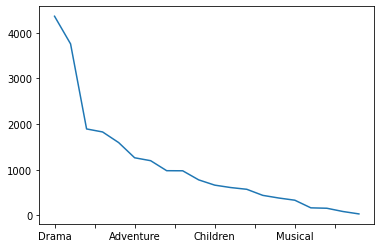

In [10]:
filmes["genres"].str.get_dummies('|').sum().sort_values(ascending = False).plot(kind = 'line')

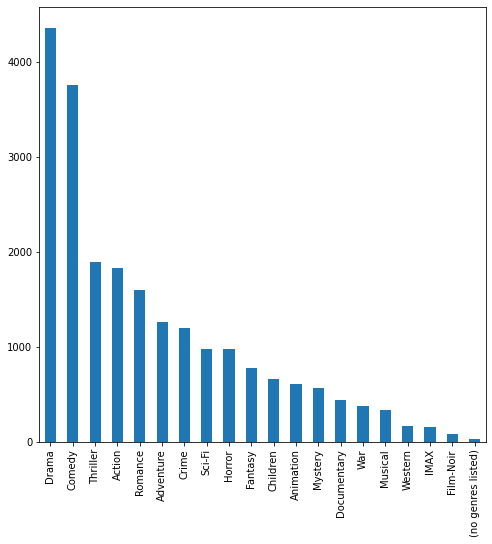

In [11]:
dados = filmes["genres"].str.get_dummies('|').sum().sort_values(ascending = False).plot(
    kind = 'bar',
    figsize = (8,8))
plt.show()

##Desafio 1: Colocar os thicks em 45°

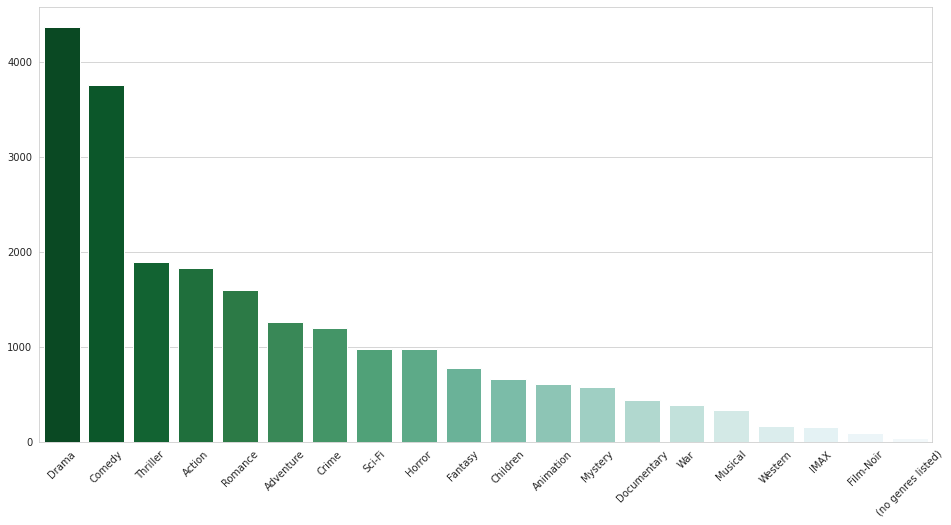

In [12]:
  filmes_por_genero = filmes["genres"].str.get_dummies('|').sum().sort_values(ascending = False)
  sns.set_style("whitegrid")
  plt.figure(figsize = (16, 8))
  sns.barplot(x = filmes_por_genero.index, y = filmes_por_genero.values, palette= "BuGn_r")
  plt.xticks(rotation = 45)
  plt.show()

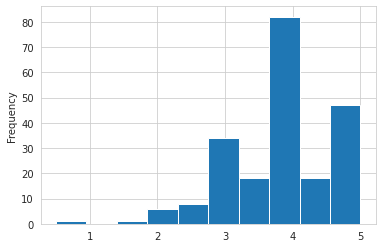

In [13]:
avaliacoes.query("movieId==1")["rating"].plot(kind = 'hist')

##Desafio 2: Comparar outros filmes com notas proximas e achar distribuições diferentes

In [0]:
def plot(n):
  notas_do_filme = avaliacoes.query(f'movieId=={n}')['rating']
  notas_do_filme.plot(kind = 'hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

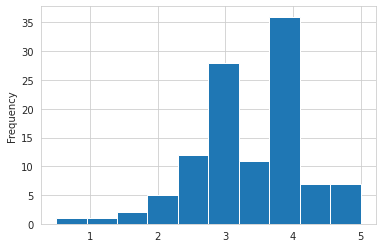

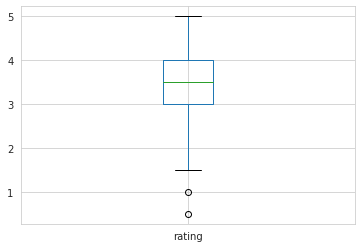

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [19]:
plot(2)

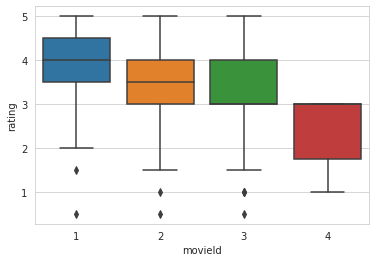

In [0]:
sns.boxplot(data = avaliacoes.query("movieId in [1,2,3,4]"), x = "movieId", y = "rating")

##Desafio 3: Criar boxplot dos 10 filmes com mais votos

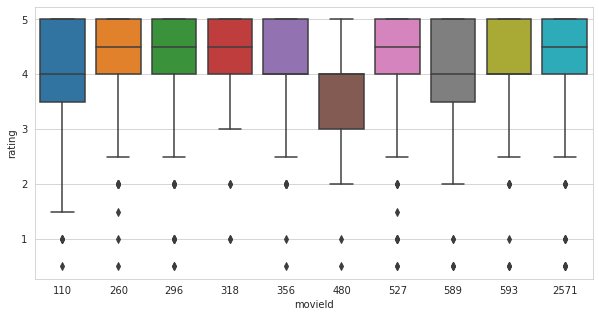

In [21]:
filmes_mais_votados = avaliacoes.groupby("movieId")["rating"].count()
filmes_mais_votados = filmes_mais_votados.sort_values(ascending=False).head(10)
list_mais_votados = filmes_mais_votados.index
plt.figure(figsize = (10, 5))
sns.boxplot(data = avaliacoes.query(f'movieId in @list_mais_votados'), x = "movieId", y = "rating")

##Desafio 4: O boxplot estar com tamanho adequado e com os nomes dos thicks

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

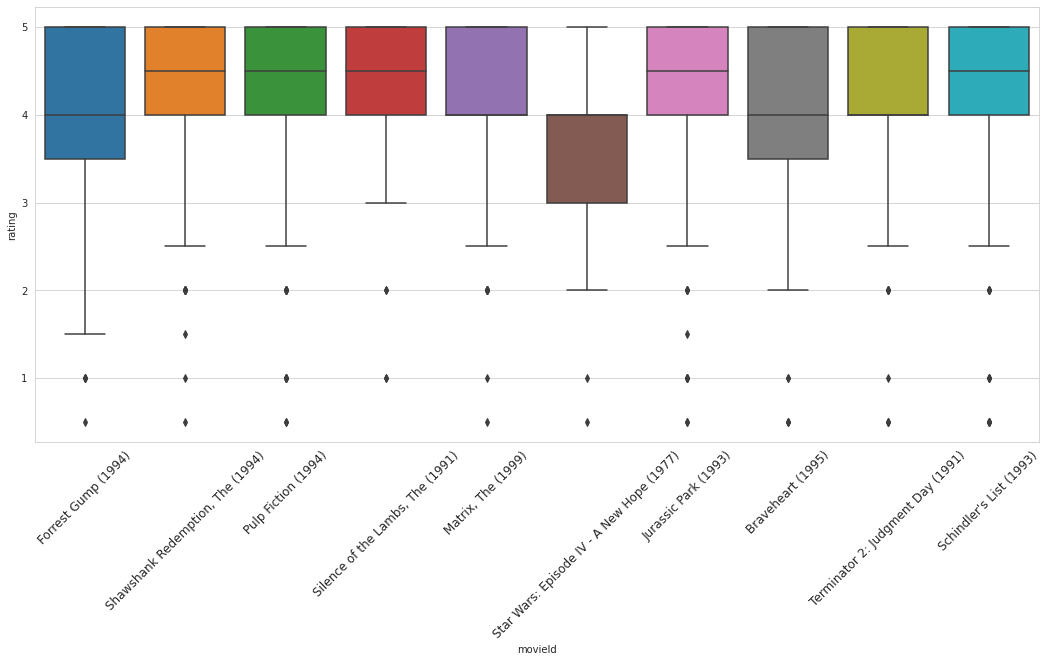

In [24]:
filmes_mais_votados2 = filmes_com_nota.sort_values('rating', ascending=False).head(10)
filmes_mais_votados2_title = filmes_mais_votados2['title'].tolist()
filmes_mais_votados2_id = filmes_mais_votados2['movieId'].tolist()

plt.figure(figsize = (18,8))
ax = sns.boxplot(x='movieId', y='rating', data=avaliacoes.query(f"movieId in {filmes_mais_votados2_id}"))
ax.set_xticklabels(filmes_mais_votados2_title, fontsize=12)
plt.xticks(rotation = 45)

##Desafio 5: Calcular moda, media, mediana dos filmes com notas mais proximas de 0.5, 3, e 4

In [0]:
def explora_filme(filmes_id):
  filme = filmes.query(f'movieId == {filmes_id}')
  nota = avaliacoes.query(f'movieId == {filmes_id}')["rating"]
  print(f'Filme: {filme.iloc[0,1]}')
  print('---------------------------')
  print(f'Moda: {nota.mode().values}')
  print(f'Média: {nota.mean()}')
  print(f'Mediana: {nota.median()}')


In [54]:
explora_filme(1)

Filme: Toy Story (1995)
---------------------------
Moda: [4.]
Média: 3.9209302325581397
Mediana: 4.0


##Desafio 6: Plotar o boxplot e o histograma um do outro (na mesma figura ou em figura distintas

In [0]:
def plotar_bh(filme_id):
  pulp_fiction = avaliacoes.query(f'movieId == {filme_id}')['rating']

  f, axes = plt.subplots(1, 2, figsize = (16,6))
  
  pulp_fiction.plot(kind = 'hist', ax = axes[0])
  pulp_fiction.plot(kind = 'box', ax = axes[1])
  plt.show()

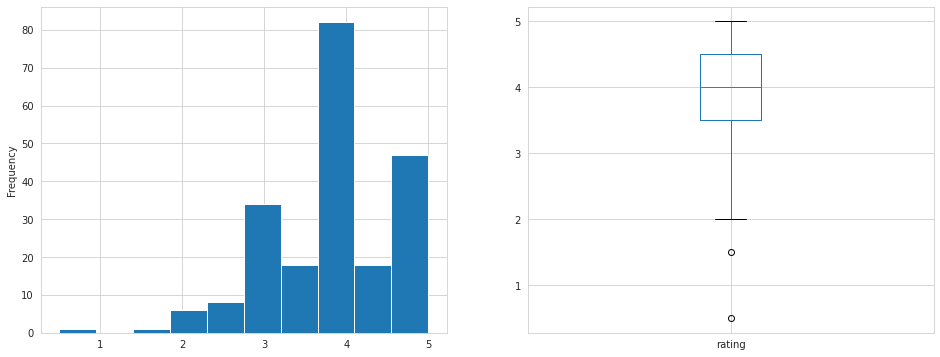

In [58]:
plotar_bh(1)

##Desafio 7: Gráfico de notas médias por ano

In [62]:
nota_media_por_filme = avaliacoes.groupby('movieId')['rating'].mean().round(decimals = 2)
nota_media_por_filme

movieId
1         3.92
2         3.43
3         3.26
4         2.36
5         3.07
          ... 
193581    4.00
193583    3.50
193585    3.50
193587    3.50
193609    4.00
Name: rating, Length: 9724, dtype: float64

In [63]:
filme_com_media = filmes.join(nota_media_por_filme, on='movieId')
filme_com_media

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


In [65]:
filme_com_media = filme_com_media.rename(columns={'rating':'nota_media'})
filme_com_media

,movieId,title,genres,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


In [70]:
filmes_com_ano = filme_com_media.copy()
filmes_com_ano['ano'] = filme_com_media['title'].str.extract("\((\d{4})\)")
filmes_com_ano.head()

,movieId,title,genres,nota_media,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,1995
4,5,Father of the Bride Part II (1995),Comedy,3.07,1995


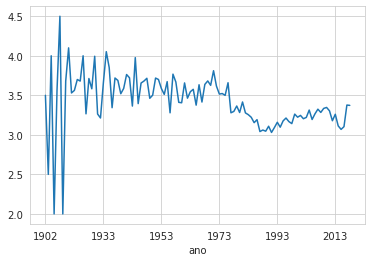

In [72]:
filmes_com_ano.groupby('ano')['nota_media'].mean().plot()